In [1]:
import matplotlib.pyplot as plt

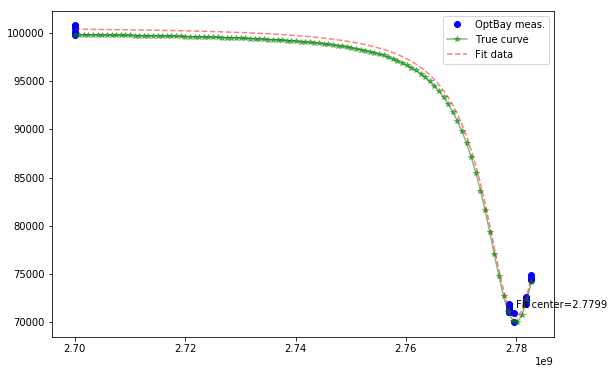

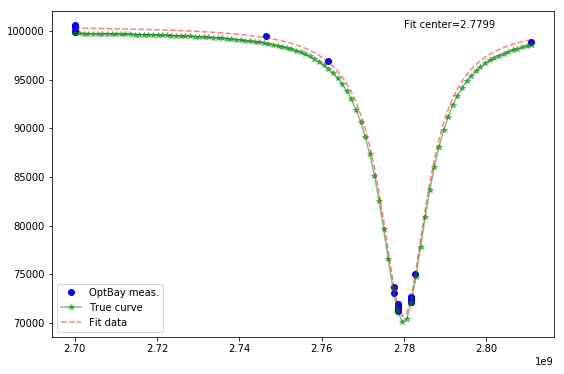

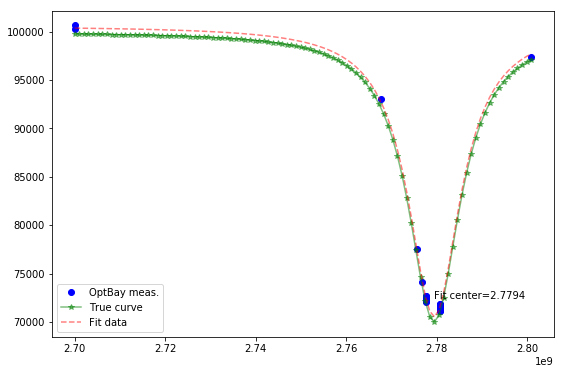

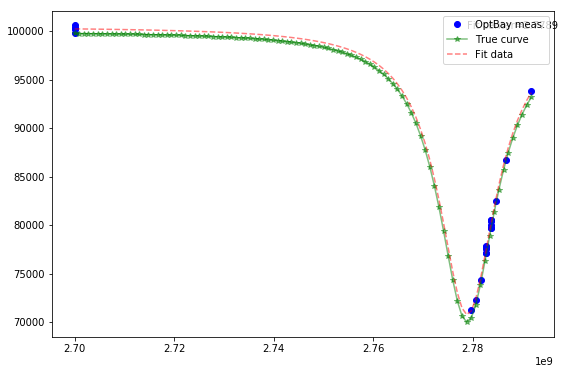

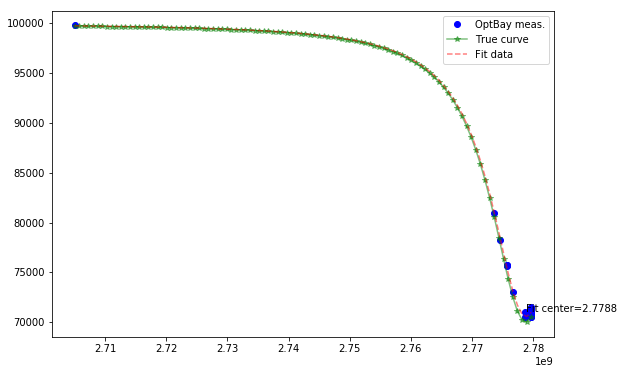

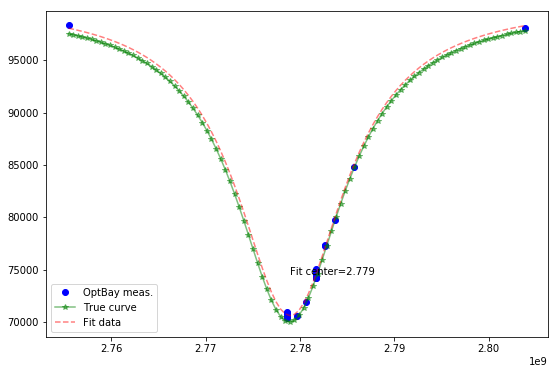

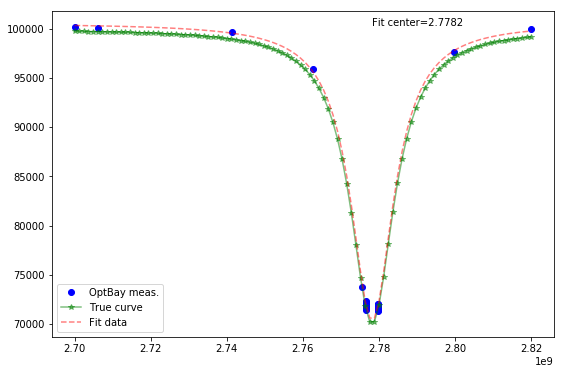

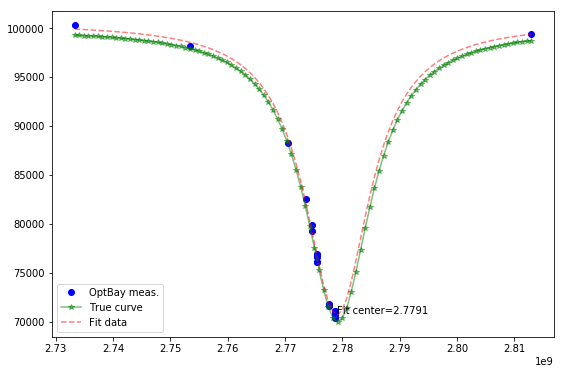

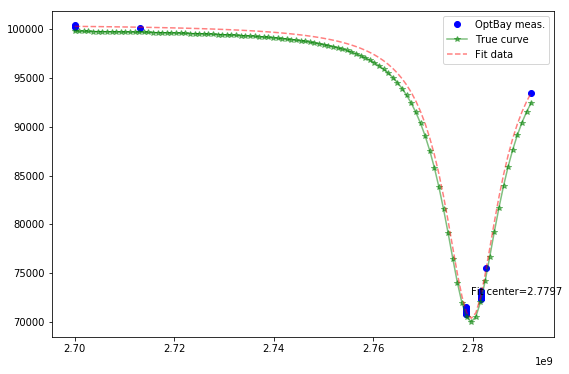

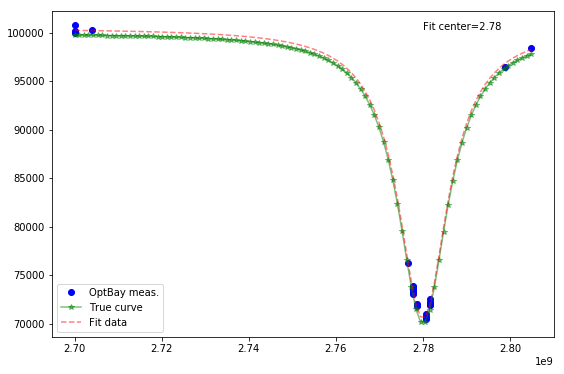

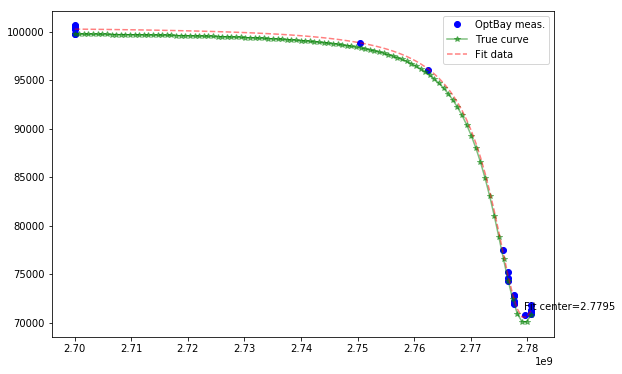

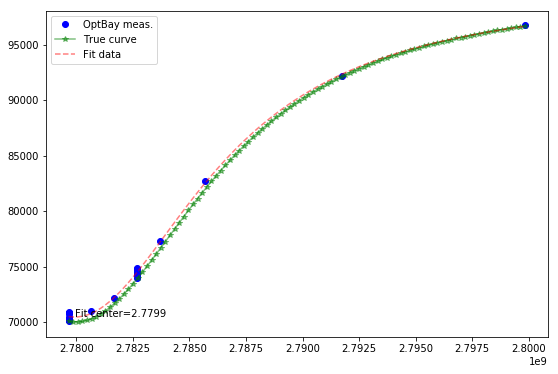

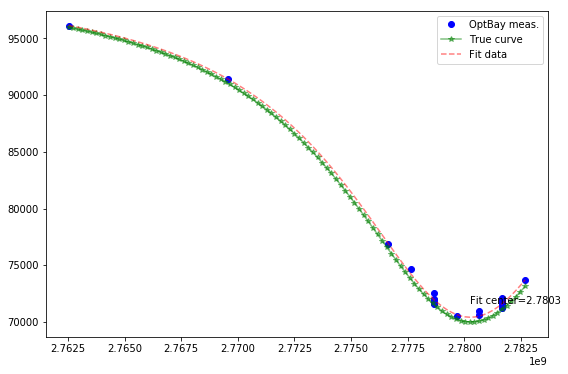

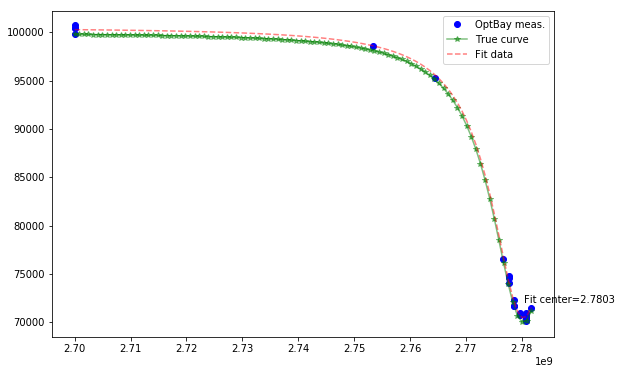

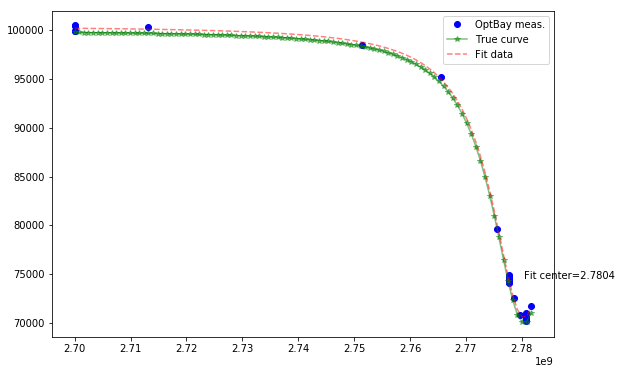

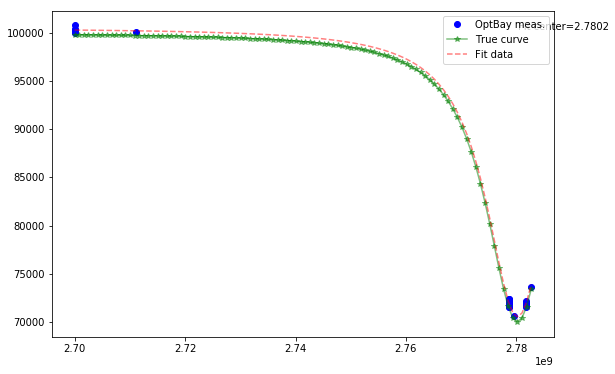

In [17]:
# c0=afm_scanner_logic._qafm_scan_array['b_field_fw']['params']['coord0_num (#)']
# c1=afm_scanner_logic._qafm_scan_array['b_field_fw']['params']['coord1_num (#)']
# c0=1
# c1=1
for j in range(c1):
    for i in range(c0):
        d = afm_scanner_logic._esr_debug[f'{j},{i}']
        x,y = (d['bay_x'], d['bay_y'])
        bay_x,bay_y = (np.asarray(x), np.asarray(y))
        x_fit = bay_x
        y_fit = bay_y
        
        mod,add_params = afm_scanner_logic._fitlogic.make_lorentzian_model()
        add_params['sigma'].set(value=d['fwhm']/2, vary=True, min=0, max=d['fwhm'])
        add_params['amplitude'].set(value=d['amp'], vary=True, max=0)
        add_params['offset'].set(value=d['offset'], vary=True, max=d['offset']*5) # maybe too arbitrary
        add_params['center'].set(value=x_fit[np.argmin(y_fit)], vary=True)
#         add_params = None
        
        res = afm_scanner_logic._fitlogic.make_lorentzian_fit(x_axis=x_fit,data=y_fit,estimator=afm_scanner_logic._fitlogic.estimate_lorentzian_dip,add_params=add_params)
        
        x1 = np.linspace(x_fit.min(), x_fit.max(),100)
        y1 = res.model.eval(x=x1, params=res.params)
        
        y2 = afm_scanner_logic.physical_lorentzian(x=x1, center=d['true_center'], sigma=7e6, amp=-30000, offset=100e3)+np.random.random((len(x1)))
        
        center = f'Fit center={round(res.params["center"].value/1e9,4)}'
        plt.text(res.params["center"].value,res.model.eval(x=d['center'], params=res.params),center)
        plt.plot(x_fit,y_fit,'bo',label='OptBay meas.', alpha=1)
        
        plt.plot(x1,y2,'g*-',alpha=0.5, label='True curve')
        
        plt.plot(x1,y1,'r--', alpha=0.5, label='Fit data')
        plt.legend()
        plt.show()
        

In [51]:
self = afm_scanner_logic

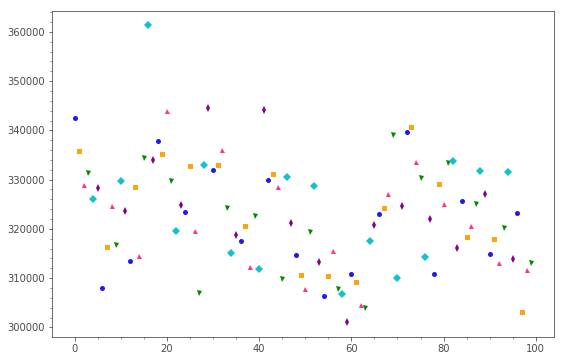

In [107]:
for i in range(100):
    self._counter._tagger.sync()
    self._counter.countrate.startFor(10*1e9, clear = True)
    self._counter.countrate.waitUntilFinished(timeout=100)
    
    d = np.nan_to_num(self._counter.countrate.getData())
    plt.plot(i,d)
plt.show()